# PAYMENT DATA PREDICTION MODEL
    

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## 1.Importing dataset

In [2]:
data = pd.read_csv(r'C:\Users\lakka\OneDrive\Desktop\ds project\H2HBABBA3171.csv')
data.shape

(50000, 19)

## understanding dataset

In [3]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200772670,ASSOCIAT llc,NaN,2020.0,1.930785e+09,2020-04-14,20200414,20200414,20200429.0,USD,RV,1.0,NaN,84174.93,20200414.0,NAU5,1.930785e+09,1
1,U001,0200769623,WAL-MAR co,2019-05-31 00:00:00,2019.0,1.929315e+09,2019-05-15,20190514,20190515,20190530.0,USD,RV,1.0,NaN,14531.22,20190515.0,NAH4,1.929315e+09,0
2,U001,0200762301,C&S WH corp,2019-12-10 00:00:00,2019.0,1.930191e+09,2019-11-25,20191125,20191125,20191210.0,USD,RV,1.0,NaN,140988.14,20191125.0,NAC6,1.930191e+09,0
3,U001,0200772670,ASSOCIAT systems,2019-03-18 00:00:00,2019.0,1.928898e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,11254.02,20190305.0,NAU5,1.928898e+09,0
4,U001,0200780383,MEIJ systems,2019-11-13 00:00:00,2019.0,1.929831e+09,2019-09-05,20190905,20190905,20191109.0,USD,RV,1.0,NaN,2365.64,20190905.0,NAGD,1.929831e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930714e+09,2020-03-30,20200328,20200330,20200414.0,USD,RV,1.0,NaN,15824.33,20200330.0,NAH4,1.930714e+09,1
49996,U001,0200769623,WAL-MAR foundation,2019-04-18 00:00:00,2019.0,1.929102e+09,2019-04-08,20190408,20190408,20190423.0,USD,RV,1.0,NaN,33344.04,20190408.0,NAH4,1.929102e+09,0
49997,CA02,0140105847,GORDON F systems,NaN,2020.0,2.960634e+09,2020-05-11,20200511,20200511,20200522.0,CAD,RV,1.0,NaN,61966.06,20200512.0,CA10,2.960634e+09,1
49998,U001,0200794332,COST co,2019-09-30 00:00:00,2019.0,1.929864e+09,2019-09-13,20190911,20190913,20190928.0,USD,RV,1.0,NaN,15727.56,20190913.0,NAAX,1.929864e+09,0


In [4]:
# Understanding The Dataframe
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200772670,ASSOCIAT llc,NaN,2020.0,1.930785e+09,2020-04-14,20200414,20200414,20200429.0,USD,RV,1.0,NaN,84174.93,20200414.0,NAU5,1.930785e+09,1
1,U001,0200769623,WAL-MAR co,2019-05-31 00:00:00,2019.0,1.929315e+09,2019-05-15,20190514,20190515,20190530.0,USD,RV,1.0,NaN,14531.22,20190515.0,NAH4,1.929315e+09,0
2,U001,0200762301,C&S WH corp,2019-12-10 00:00:00,2019.0,1.930191e+09,2019-11-25,20191125,20191125,20191210.0,USD,RV,1.0,NaN,140988.14,20191125.0,NAC6,1.930191e+09,0
3,U001,0200772670,ASSOCIAT systems,2019-03-18 00:00:00,2019.0,1.928898e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,11254.02,20190305.0,NAU5,1.928898e+09,0
4,U001,0200780383,MEIJ systems,2019-11-13 00:00:00,2019.0,1.929831e+09,2019-09-05,20190905,20190905,20191109.0,USD,RV,1.0,NaN,2365.64,20190905.0,NAGD,1.929831e+09,0


In [5]:
data.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930714e+09,2020-03-30,20200328,20200330,20200414.0,USD,RV,1.0,NaN,15824.33,20200330.0,NAH4,1.930714e+09,1
49996,U001,0200769623,WAL-MAR foundation,2019-04-18 00:00:00,2019.0,1.929102e+09,2019-04-08,20190408,20190408,20190423.0,USD,RV,1.0,NaN,33344.04,20190408.0,NAH4,1.929102e+09,0
49997,CA02,0140105847,GORDON F systems,NaN,2020.0,2.960634e+09,2020-05-11,20200511,20200511,20200522.0,CAD,RV,1.0,NaN,61966.06,20200512.0,CA10,2.960634e+09,1
49998,U001,0200794332,COST co,2019-09-30 00:00:00,2019.0,1.929864e+09,2019-09-13,20190911,20190913,20190928.0,USD,RV,1.0,NaN,15727.56,20190913.0,NAAX,1.929864e+09,0
49999,U001,0200148860,DOLLA llc,2019-09-27 00:00:00,2019.0,1.929873e+09,2019-09-13,20190913,20190913,20190928.0,USD,RV,1.0,NaN,4781.32,20190913.0,NAA8,1.929873e+09,0


In [6]:
# Checking for Unique values
data.nunique().to_frame(name = 'Count')

,Count
business_code,6
cust_number,1413
name_customer,4177
clear_date,399
buisness_year,2
doc_id,48781
posting_date,503
document_create_date,506
document_create_date.1,503
due_in_date,547


In [7]:
data.isna()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49997,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [8]:
# Checking Null Values in each column
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

## 2.Slice out the records with Clearing date Null into a New DataFrame

In [9]:
# As we need to predict the clear_date for unknown values we are creating the new dataframe
# If Clear_date Is Null in the current dataframe, saving it to predict_dataframe
predict_dataframe = data[data['clear_date'].isnull() == True]
predict_dataframe.shape

(10000, 19)

In [10]:
#Datafrme=Clear_Date with non-null values
#Predict_dataframe=Clear_Date with null values
dataframe = data[data.clear_date.isnull()==False]
dataframe.shape


(40000, 19)

## 3.data preprocessing

In [11]:
dataframe.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

## here,we are having null values in area_business and invoice_id.so,we need to drop them.

In [12]:
#As we have constant null values in area_business column, we are dropping it
dataframe.drop('area_business', axis=1, inplace=True)
dataframe.shape


(40000, 18)

In [13]:
#Checking for null values in invoice-id
dataframe[dataframe.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
827,CA02,0100030194,AMAZO foundation,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190320,20190330.0,CAD,X2,1.0,1326.00,20190320.0,CA10,NaN,0
10818,CA02,0140104225,SAVE-ON-,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190221,20190303.0,CAD,X2,1.0,4065.13,20190221.0,CA10,NaN,0
14343,CA02,0140104223,H Y LO co,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190319,20190329.0,CAD,X2,1.0,4680.00,20190319.0,CA10,NaN,0
22899,CA02,0140104409,LOB in,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190124,20190203.0,CAD,X2,1.0,4392.00,20190124.0,CA10,NaN,0
30008,CA02,0140106054,TREE in,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190328,20190407.0,CAD,X2,1.0,216.80,20190328.0,CA10,NaN,0
30319,CA02,0140104429,COSTCO co,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190227,20190309.0,CAD,X2,1.0,52992.00,20190227.0,CA10,NaN,0
42305,CA02,0100054349,PURITY L corporation,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190315,20190325.0,CAD,X2,1.0,631.80,20190315.0,CA10,NaN,0


In [14]:
#Removing null values in invoice_id as it is unique
dataframe = dataframe[dataframe.invoice_id.isnull()==False]

In [15]:
dataframe.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [16]:
dataframe.shape

(39993, 18)

In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39993 entries, 1 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39993 non-null  object 
 1   cust_number             39993 non-null  object 
 2   name_customer           39993 non-null  object 
 3   clear_date              39993 non-null  object 
 4   buisness_year           39993 non-null  float64
 5   doc_id                  39993 non-null  float64
 6   posting_date            39993 non-null  object 
 7   document_create_date    39993 non-null  int64  
 8   document_create_date.1  39993 non-null  int64  
 9   due_in_date             39993 non-null  float64
 10  invoice_currency        39993 non-null  object 
 11  document type           39993 non-null  object 
 12  posting_id              39993 non-null  float64
 13  total_open_amount       39993 non-null  float64
 14  baseline_create_date    39993 non-null

## Converting datatype of dates to DATE_TIME format

In [18]:
dataframe['clear_date'] = pd.to_datetime(dataframe.clear_date)
dataframe['posting_date'] = pd.to_datetime(dataframe.posting_date)
dataframe['due_in_date']=pd.to_datetime(dataframe.due_in_date, format='%Y%m%d')
dataframe['document_create_date']=pd.to_datetime(dataframe.document_create_date, format='%Y%m%d')
dataframe['document_create_date.1']=pd.to_datetime(dataframe['document_create_date.1'], format='%Y%m%d')
dataframe['baseline_create_date']=pd.to_datetime(dataframe.baseline_create_date, format='%Y%m%d')

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39993 entries, 1 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39993 non-null  object        
 1   cust_number             39993 non-null  object        
 2   name_customer           39993 non-null  object        
 3   clear_date              39993 non-null  datetime64[ns]
 4   buisness_year           39993 non-null  float64       
 5   doc_id                  39993 non-null  float64       
 6   posting_date            39993 non-null  datetime64[ns]
 7   document_create_date    39993 non-null  datetime64[ns]
 8   document_create_date.1  39993 non-null  datetime64[ns]
 9   due_in_date             39993 non-null  datetime64[ns]
 10  invoice_currency        39993 non-null  object        
 11  document type           39993 non-null  object        
 12  posting_id              39993 non-null  float6

In [20]:
dataframe.nunique()

business_code                 6
cust_number                1346
name_customer              3911
clear_date                  399
buisness_year                 2
doc_id                    39090
posting_date                422
document_create_date        425
document_create_date.1      422
due_in_date                 489
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35573
baseline_create_date        430
cust_payment_terms           70
invoice_id                39090
isOpen                        1
dtype: int64

## categorical of columns 

In [21]:
# For catagorical columns with relatively low unique value -- looking for value_counts
for col in dataframe.columns:
    if dataframe[col].nunique()<= 12:
        print(dataframe[col].value_counts())
        print('----------------------------------------------')

U001    36079
CA02     3268
U013      501
U002      126
U005       14
U007        5
Name: business_code, dtype: int64
----------------------------------------------
2019.0    34799
2020.0     5194
Name: buisness_year, dtype: int64
----------------------------------------------
USD    36724
CAD     3269
Name: invoice_currency, dtype: int64
----------------------------------------------
RV    39993
Name: document type, dtype: int64
----------------------------------------------
1.0    39993
Name: posting_id, dtype: int64
----------------------------------------------
0    39993
Name: isOpen, dtype: int64
----------------------------------------------


In [22]:
# clubbing Business codes with low occurance in dataset - to ensure model gets max information
dataframe['business_code'] = np.where(dataframe['business_code'].isin(["U005","U007"]),"Others",dataframe['business_code'])


In [23]:
for col in dataframe.columns:
    if dataframe[col].nunique()<= 12:
        print(dataframe[col].value_counts())
        print('---------------------------------')

U001      36079
CA02       3268
U013        501
U002        126
Others       19
Name: business_code, dtype: int64
---------------------------------
2019.0    34799
2020.0     5194
Name: buisness_year, dtype: int64
---------------------------------
USD    36724
CAD     3269
Name: invoice_currency, dtype: int64
---------------------------------
RV    39993
Name: document type, dtype: int64
---------------------------------
1.0    39993
Name: posting_id, dtype: int64
---------------------------------
0    39993
Name: isOpen, dtype: int64
---------------------------------


## removal of duplicate rows

In [24]:
dataframe=dataframe.drop_duplicates(keep='first')

In [25]:
dataframe.shape

(39090, 18)

In [26]:
# As we already removed null values, just for re-check droping rows if we have null values in any column.
dataframe=dataframe.dropna(how='any')

In [27]:
## As we already removed we got the same shape value as before
dataframe.shape

(39090, 18)

## convertion CAD to USD in total amount column

In [28]:
temp = dataframe[dataframe['invoice_currency']=='CAD']['total_open_amount'].map(lambda temp: temp*0.79)
for i in temp.index:
    dataframe['total_open_amount'][i] = 0.79*temp[i]


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39090 entries, 1 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39090 non-null  object        
 1   cust_number             39090 non-null  object        
 2   name_customer           39090 non-null  object        
 3   clear_date              39090 non-null  datetime64[ns]
 4   buisness_year           39090 non-null  float64       
 5   doc_id                  39090 non-null  float64       
 6   posting_date            39090 non-null  datetime64[ns]
 7   document_create_date    39090 non-null  datetime64[ns]
 8   document_create_date.1  39090 non-null  datetime64[ns]
 9   due_in_date             39090 non-null  datetime64[ns]
 10  invoice_currency        39090 non-null  object        
 11  document type           39090 non-null  object        
 12  posting_id              39090 non-null  float6

## creating target column(DELAY)

In [30]:
dataframe['delay'] = pd.Series(dataframe['clear_date'] - dataframe['due_in_date']).dt.days


In [31]:
dataframe.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
1,U001,0200769623,WAL-MAR co,2019-05-31,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-15,2019-05-30,USD,RV,1.0,14531.22,2019-05-15,NAH4,1.929315e+09,0,1
2,U001,0200762301,C&S WH corp,2019-12-10,2019.0,1.930191e+09,2019-11-25,2019-11-25,2019-11-25,2019-12-10,USD,RV,1.0,140988.14,2019-11-25,NAC6,1.930191e+09,0,0
3,U001,0200772670,ASSOCIAT systems,2019-03-18,2019.0,1.928898e+09,2019-03-05,2019-03-05,2019-03-05,2019-03-20,USD,RV,1.0,11254.02,2019-03-05,NAU5,1.928898e+09,0,-2
4,U001,0200780383,MEIJ systems,2019-11-13,2019.0,1.929831e+09,2019-09-05,2019-09-05,2019-09-05,2019-11-09,USD,RV,1.0,2365.64,2019-09-05,NAGD,1.929831e+09,0,4
5,U001,0200781803,JRD corp,2020-02-28,2020.0,1.930527e+09,2020-02-14,2020-02-14,2020-02-14,2020-02-29,USD,RV,1.0,32209.56,2020-02-14,NAA8,1.930527e+09,0,-1


## outlier identification

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

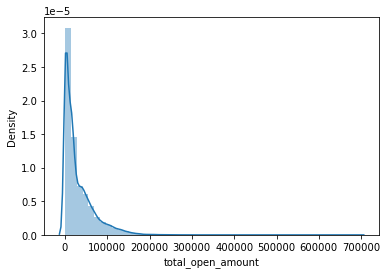

In [32]:
# Checking for outliers
sample=dataframe['total_open_amount']
sns.distplot(sample)

In [33]:
# setting limits
upper_lim = dataframe['total_open_amount'].quantile(.95)
lower_lim = dataframe['total_open_amount'].quantile(.01)

In [34]:
# Removing Outliers
dataframe = dataframe[(dataframe['total_open_amount'] < upper_lim) & (dataframe['total_open_amount'] > lower_lim)]

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

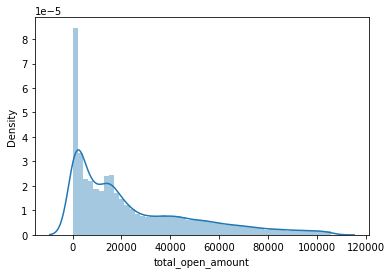

In [35]:
# Graph after removing Outliers
sample=dataframe['total_open_amount']
sns.distplot(sample)

In [36]:
# Importing required libraries
from sklearn.model_selection import train_test_split

In [37]:
# Splitting Dataframe to training and Remaining
#                           70%          30%
x = dataframe.drop(columns = ['clear_date', 'delay'])
y = dataframe['delay']

# In the first step we will split the data in training and remaining dataset
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.7,random_state=0 , shuffle = False)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# Splitting remaining data into validation and testing
#                                50%(15%)      50%(15%)
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.5,random_state=0 , shuffle = False)
print(x_train.shape), print(y_train.shape)
print(x_val.shape), print(y_val.shape)
print(x_test.shape), print(y_test.shape)


(25720, 17)
(25720,)
(5511, 17)
(5511,)
(5512, 17)
(5512,)


(None, None)

In [38]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200769623,WAL-MAR co,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-15,2019-05-30,USD,RV,1.0,14531.22,2019-05-15,NAH4,1.929315e+09,0
3,U001,0200772670,ASSOCIAT systems,2019.0,1.928898e+09,2019-03-05,2019-03-05,2019-03-05,2019-03-20,USD,RV,1.0,11254.02,2019-03-05,NAU5,1.928898e+09,0
4,U001,0200780383,MEIJ systems,2019.0,1.929831e+09,2019-09-05,2019-09-05,2019-09-05,2019-11-09,USD,RV,1.0,2365.64,2019-09-05,NAGD,1.929831e+09,0
5,U001,0200781803,JRD corp,2020.0,1.930527e+09,2020-02-14,2020-02-14,2020-02-14,2020-02-29,USD,RV,1.0,32209.56,2020-02-14,NAA8,1.930527e+09,0
7,U001,0200794332,COST in,2019.0,1.930189e+09,2019-11-25,2019-11-24,2019-11-25,2019-12-10,USD,RV,1.0,33519.02,2019-11-25,NAAX,1.930189e+09,0


## 5.EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

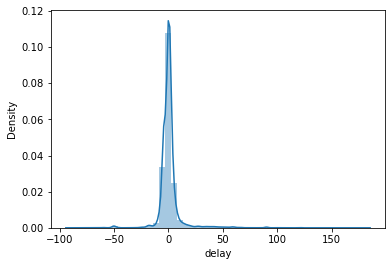

In [39]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

In [40]:
x_train.merge(y_train,on = x_train.index)

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,1,U001,0200769623,WAL-MAR co,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-15,2019-05-30,USD,RV,1.0,14531.22,2019-05-15,NAH4,1.929315e+09,0,1
1,3,U001,0200772670,ASSOCIAT systems,2019.0,1.928898e+09,2019-03-05,2019-03-05,2019-03-05,2019-03-20,USD,RV,1.0,11254.02,2019-03-05,NAU5,1.928898e+09,0,-2
2,4,U001,0200780383,MEIJ systems,2019.0,1.929831e+09,2019-09-05,2019-09-05,2019-09-05,2019-11-09,USD,RV,1.0,2365.64,2019-09-05,NAGD,1.929831e+09,0,4
3,5,U001,0200781803,JRD corp,2020.0,1.930527e+09,2020-02-14,2020-02-14,2020-02-14,2020-02-29,USD,RV,1.0,32209.56,2020-02-14,NAA8,1.930527e+09,0,-1
4,7,U001,0200794332,COST in,2019.0,1.930189e+09,2019-11-25,2019-11-24,2019-11-25,2019-12-10,USD,RV,1.0,33519.02,2019-11-25,NAAX,1.930189e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25715,34760,U001,0200936373,SUPE llc,2019.0,1.929719e+09,2019-08-07,2019-08-07,2019-08-07,2019-08-22,USD,RV,1.0,2720.62,2019-08-07,NAA8,1.929719e+09,0,90
25716,34762,U001,0200769623,WAL-MAR foundation,2019.0,1.928696e+09,2019-01-29,2019-01-28,2019-01-29,2019-02-13,USD,RV,1.0,28990.51,2019-01-29,NAH4,1.928696e+09,0,2
25717,34763,U001,0100032284,KEURIG associates,2019.0,1.928711e+09,2019-02-01,2019-01-30,2019-02-01,2019-03-13,USD,RV,1.0,20256.75,2019-02-01,NAD4,1.928711e+09,0,105
25718,34766,U001,0200759878,SA llc,2019.0,1.930136e+09,2019-11-13,2019-11-10,2019-11-13,2019-11-28,USD,RV,1.0,14545.47,2019-11-13,NAH4,1.930136e+09,0,4


<AxesSubplot:xlabel='delay', ylabel='business_code'>

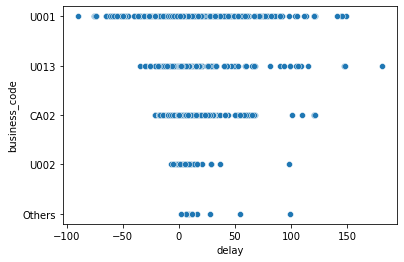

In [41]:
#No direct trend
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="business_code")

<AxesSubplot:xlabel='delay', ylabel='buisness_year'>

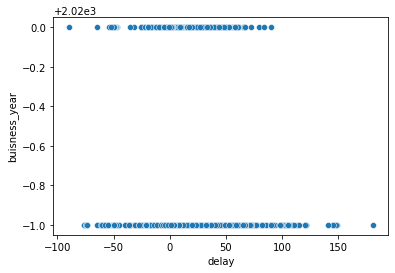

In [42]:
#No direct trend
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="buisness_year")

<AxesSubplot:xlabel='delay', ylabel='invoice_currency'>

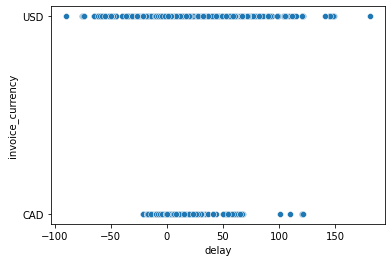

In [43]:
#No direct trend
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="invoice_currency")

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

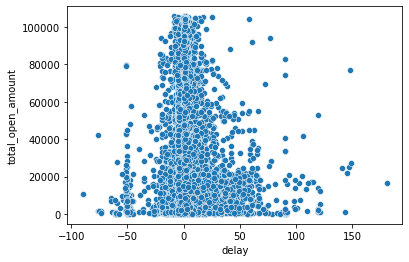

In [44]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="total_open_amount")

<AxesSubplot:xlabel='delay', ylabel='cust_payment_terms'>

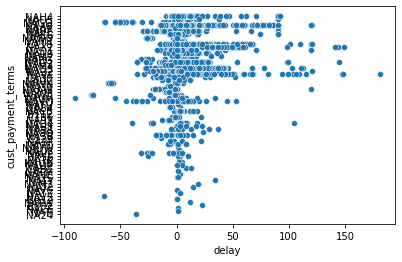

In [45]:
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="cust_payment_terms")

## 6.feature engineering

In [46]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25720 entries, 1 to 34769
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           25720 non-null  object        
 1   cust_number             25720 non-null  object        
 2   name_customer           25720 non-null  object        
 3   buisness_year           25720 non-null  float64       
 4   doc_id                  25720 non-null  float64       
 5   posting_date            25720 non-null  datetime64[ns]
 6   document_create_date    25720 non-null  datetime64[ns]
 7   document_create_date.1  25720 non-null  datetime64[ns]
 8   due_in_date             25720 non-null  datetime64[ns]
 9   invoice_currency        25720 non-null  object        
 10  document type           25720 non-null  object        
 11  posting_id              25720 non-null  float64       
 12  total_open_amount       25720 non-null  float6

In [47]:
# removing Preeciding 0's in Customer Number
# I'm not removing cust_number with alpha-numeric values because there might be case that it exist as alpha-numeric
x_train['cust_number']=x_train['cust_number'].str.lstrip('0')
x_val['cust_number']=x_val['cust_number'].str.lstrip('0')
x_test['cust_number']=x_test['cust_number'].str.lstrip('0')

In [48]:
# Importing Required Libraries
from sklearn.preprocessing import LabelEncoder


In [49]:
#changing the datatypes to category datatype
x_train[['business_code_enc', 'cust_number_enc','name_customer_enc','invoice_currency_enc','cust_payment_terms_enc']] = x_train[['business_code', 'cust_number','name_customer','invoice_currency','cust_payment_terms']].astype('category')
x_val[['business_code_enc', 'cust_number_enc','name_customer_enc','invoice_currency_enc','cust_payment_terms_enc']] = x_val[['business_code', 'cust_number','name_customer','invoice_currency','cust_payment_terms']].astype('category')
x_test[['business_code_enc', 'cust_number_enc','name_customer_enc','invoice_currency_enc','cust_payment_terms_enc']] = x_test[['business_code', 'cust_number','name_customer','invoice_currency','cust_payment_terms']].astype('category')


In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25720 entries, 1 to 34769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           25720 non-null  object        
 1   cust_number             25720 non-null  object        
 2   name_customer           25720 non-null  object        
 3   buisness_year           25720 non-null  float64       
 4   doc_id                  25720 non-null  float64       
 5   posting_date            25720 non-null  datetime64[ns]
 6   document_create_date    25720 non-null  datetime64[ns]
 7   document_create_date.1  25720 non-null  datetime64[ns]
 8   due_in_date             25720 non-null  datetime64[ns]
 9   invoice_currency        25720 non-null  object        
 10  document type           25720 non-null  object        
 11  posting_id              25720 non-null  float64       
 12  total_open_amount       25720 non-null  float6

In [51]:
# Encoding the selected data
x_train['business_code_enc'] = x_train['business_code_enc'].cat.codes
x_train['cust_number_enc'] = x_train['cust_number_enc'].cat.codes
x_train['name_customer_enc'] = x_train['name_customer_enc'].cat.codes
x_train['invoice_currency_enc'] = x_train['invoice_currency_enc'].cat.codes
x_train['cust_payment_terms_enc'] = x_train['cust_payment_terms_enc'].cat.codes


In [52]:
# Encoding the selected data
x_val['business_code_enc'] = x_val['business_code_enc'].cat.codes
x_val['cust_number_enc'] = x_val['cust_number_enc'].cat.codes
x_val['name_customer_enc'] = x_val['name_customer_enc'].cat.codes
x_val['invoice_currency_enc'] = x_val['invoice_currency_enc'].cat.codes
x_val['cust_payment_terms_enc'] = x_val['cust_payment_terms_enc'].cat.codes


In [53]:
# Encoding the selected data
x_test['business_code_enc'] = x_test['business_code_enc'].cat.codes
x_test['cust_number_enc'] = x_test['cust_number_enc'].cat.codes
x_test['name_customer_enc'] = x_test['name_customer_enc'].cat.codes
x_test['invoice_currency_enc'] = x_test['invoice_currency_enc'].cat.codes
x_test['cust_payment_terms_enc'] = x_test['cust_payment_terms_enc'].cat.codes


In [54]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,cust_payment_terms_enc
1,U001,200769623,WAL-MAR co,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-15,2019-05-30,USD,...,14531.22,2019-05-15,NAH4,1.929315e+09,0,2,749,3135,1,34
3,U001,200772670,ASSOCIAT systems,2019.0,1.928898e+09,2019-03-05,2019-03-05,2019-03-05,2019-03-20,USD,...,11254.02,2019-03-05,NAU5,1.928898e+09,0,2,756,211,1,48
4,U001,200780383,MEIJ systems,2019.0,1.929831e+09,2019-09-05,2019-09-05,2019-09-05,2019-11-09,USD,...,2365.64,2019-09-05,NAGD,1.929831e+09,0,2,774,1944,1,33
5,U001,200781803,JRD corp,2020.0,1.930527e+09,2020-02-14,2020-02-14,2020-02-14,2020-02-29,USD,...,32209.56,2020-02-14,NAA8,1.930527e+09,0,2,777,1526,1,20
7,U001,200794332,COST in,2019.0,1.930189e+09,2019-11-25,2019-11-24,2019-11-25,2019-12-10,USD,...,33519.02,2019-11-25,NAAX,1.930189e+09,0,2,817,677,1,22


In [55]:
# function will delete a column from train , val and test
def drop_column(col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [56]:
# As document_create_date and document_create_date.1 are similar, dropping it from the dataframe
x_train ,x_val, x_test = drop_column(['document_create_date'])

In [57]:
# Deriving New Feature from due_in_date and baseline_create_date
x_train['due_term']=pd.Series(x_train['due_in_date'] - x_train['baseline_create_date']).dt.days
x_val['due_term']=pd.Series(x_val['due_in_date'] - x_val['baseline_create_date']).dt.days
x_test['due_term']=pd.Series(x_test['due_in_date'] - x_test['baseline_create_date']).dt.days


In [58]:
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,cust_payment_terms_enc,due_term
1,U001,200769623,WAL-MAR co,2019.0,1.929315e+09,2019-05-15,2019-05-15,2019-05-30,USD,RV,...,2019-05-15,NAH4,1.929315e+09,0,2,749,3135,1,34,15
3,U001,200772670,ASSOCIAT systems,2019.0,1.928898e+09,2019-03-05,2019-03-05,2019-03-20,USD,RV,...,2019-03-05,NAU5,1.928898e+09,0,2,756,211,1,48,15
4,U001,200780383,MEIJ systems,2019.0,1.929831e+09,2019-09-05,2019-09-05,2019-11-09,USD,RV,...,2019-09-05,NAGD,1.929831e+09,0,2,774,1944,1,33,65
5,U001,200781803,JRD corp,2020.0,1.930527e+09,2020-02-14,2020-02-14,2020-02-29,USD,RV,...,2020-02-14,NAA8,1.930527e+09,0,2,777,1526,1,20,15
7,U001,200794332,COST in,2019.0,1.930189e+09,2019-11-25,2019-11-25,2019-12-10,USD,RV,...,2019-11-25,NAAX,1.930189e+09,0,2,817,677,1,22,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34760,U001,200936373,SUPE llc,2019.0,1.929719e+09,2019-08-07,2019-08-07,2019-08-22,USD,RV,...,2019-08-07,NAA8,1.929719e+09,0,2,874,2778,1,20,15
34762,U001,200769623,WAL-MAR foundation,2019.0,1.928696e+09,2019-01-29,2019-01-29,2019-02-13,USD,RV,...,2019-01-29,NAH4,1.928696e+09,0,2,749,3138,1,34,15
34763,U001,100032284,KEURIG associates,2019.0,1.928711e+09,2019-02-01,2019-02-01,2019-03-13,USD,RV,...,2019-02-01,NAD4,1.928711e+09,0,2,119,1576,1,29,40
34766,U001,200759878,SA llc,2019.0,1.930136e+09,2019-11-13,2019-11-13,2019-11-28,USD,RV,...,2019-11-13,NAH4,1.930136e+09,0,2,727,2492,1,34,15


In [59]:
#extract day & month from posting_date  

x_train['posting_date_day'] = x_train['posting_date'].dt.day
x_train['posting_date_month'] = x_train['posting_date'].dt.month

x_val['posting_date_day'] = x_val['posting_date'].dt.day
x_val['posting_date_month'] = x_val['posting_date'].dt.month

x_test['posting_date_day'] = x_test['posting_date'].dt.day
x_test['posting_date_month'] = x_test['posting_date'].dt.month


In [60]:
# Deriving new feature from due_in_date
x_val['due_quarter'] = x_val['due_in_date'].dt.quarter
x_train['due_quarter'] = x_train['due_in_date'].dt.quarter
x_test['due_quarter'] = x_test['due_in_date'].dt.quarter

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

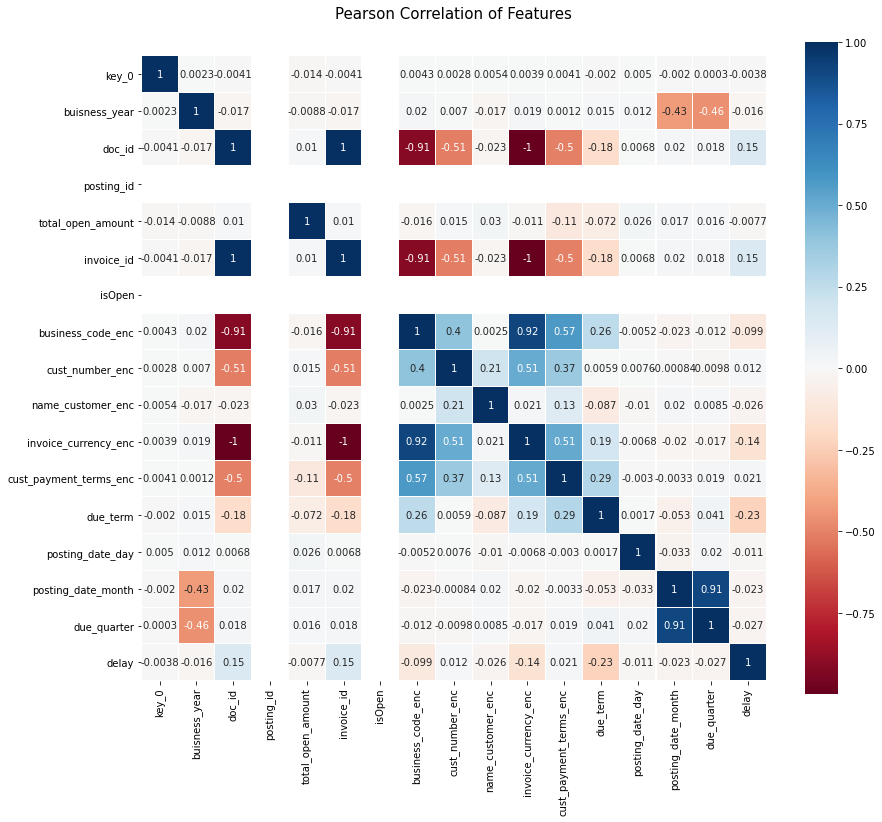

In [61]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [62]:
# here you can see business_year is a constant column hence should be dropped 
x_train ,x_val, x_test = drop_column(['buisness_year'])

In [63]:
# We are also dropping columns with datetime as datatype as it doesn't fit to the model
x_train ,x_val, x_test = drop_column(['posting_date'])
x_train ,x_val, x_test = drop_column(['document_create_date.1'])
x_train ,x_val, x_test = drop_column(['due_in_date'])
x_train ,x_val, x_test = drop_column(['baseline_create_date'])
x_train ,x_val, x_test = drop_column(['document type'])


In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25720 entries, 1 to 34769
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           25720 non-null  object 
 1   cust_number             25720 non-null  object 
 2   name_customer           25720 non-null  object 
 3   doc_id                  25720 non-null  float64
 4   invoice_currency        25720 non-null  object 
 5   posting_id              25720 non-null  float64
 6   total_open_amount       25720 non-null  float64
 7   cust_payment_terms      25720 non-null  object 
 8   invoice_id              25720 non-null  float64
 9   isOpen                  25720 non-null  int64  
 10  business_code_enc       25720 non-null  int8   
 11  cust_number_enc         25720 non-null  int16  
 12  name_customer_enc       25720 non-null  int16  
 13  invoice_currency_enc    25720 non-null  int8   
 14  cust_payment_terms_enc  25720 non-null

In [66]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;-D

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)
sel.fit(x_val)
sel.fit(x_test)

ValueError: could not convert string to float: 'U001'

In [67]:
x_train.shape, x_val.shape, x_test.shape

((25720, 19), (5511, 19), (5512, 19))

In [68]:
x_train.head()

,business_code,cust_number,name_customer,doc_id,invoice_currency,posting_id,total_open_amount,cust_payment_terms,invoice_id,isOpen,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,cust_payment_terms_enc,due_term,posting_date_day,posting_date_month,due_quarter
1,U001,200769623,WAL-MAR co,1.929315e+09,USD,1.0,14531.22,NAH4,1.929315e+09,0,2,749,3135,1,34,15,15,5,2
3,U001,200772670,ASSOCIAT systems,1.928898e+09,USD,1.0,11254.02,NAU5,1.928898e+09,0,2,756,211,1,48,15,5,3,1
4,U001,200780383,MEIJ systems,1.929831e+09,USD,1.0,2365.64,NAGD,1.929831e+09,0,2,774,1944,1,33,65,5,9,4
5,U001,200781803,JRD corp,1.930527e+09,USD,1.0,32209.56,NAA8,1.930527e+09,0,2,777,1526,1,20,15,14,2,1
7,U001,200794332,COST in,1.930189e+09,USD,1.0,33519.02,NAAX,1.930189e+09,0,2,817,677,1,22,15,25,11,4


## 6.Feature Selection

In [69]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=(1,6),
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [70]:
sfs.fit(x_train, y_train)
sfs.k_feature_names_

ValueError: could not convert string to float: 'U001'

In [71]:
x_train_features = x_train[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]

x_val_features = x_val[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]



## 7.model Building

In [72]:
# Importing required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [73]:
# Defining Lists to Store in the Results and Names of Algorithms
# Modeling & Accuracy Metrics
MSE_Score = []
R2_Score = []
Algorithm = []

In [74]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train_features, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val_features)

In [75]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [76]:
# Fitting Simple KNN to the Training Set
Algorithm.append('KNN')
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train_features, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val_features)

In [77]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [78]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(random_state=0 , max_depth=5)
clf.fit(x_train_features, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val_features)

In [79]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [80]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor(max_depth=5)
clf.fit(x_train_features, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val_features)

In [81]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [82]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])


In [83]:
#7 Features
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,110.083472,0.055640
1,KNN,192.542188,-0.651739
2,Decision Tree Regressor,137.277422,-0.177646
3,Random Forest Regressor,121.246809,-0.040126


In [84]:
# From this I think Decision tree and Random Forest will working fine by HyperTuning
# So, lets check this with different features
# HyperTuning

In [85]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=(1,3),
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [86]:
sfs.fit(x_train, y_train)
sfs.k_feature_names_

ValueError: could not convert string to float: 'U001'

In [87]:
x_train_features = x_train[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]

x_val_features = x_val[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]
'''
'cust_number',
 'name_customer',
 'invoice_currency',
 'cust_payment_terms',
 'invoice_id',
 'due_term'
'''

"\n'cust_number',\n 'name_customer',\n 'invoice_currency',\n 'cust_payment_terms',\n 'invoice_id',\n 'due_term'\n"

In [88]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [89]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(random_state=0 , max_depth=5)
clf.fit(x_train_features, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val_features)

In [90]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [91]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor(max_depth=5)
clf.fit(x_train_features, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val_features)

In [92]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [93]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])


In [94]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Decision Tree Regressor,137.277422,-0.177646
1,Random Forest Regressor,126.200428,-0.082621


In [95]:
X_Train = pd.concat([x_train, x_val])
Y_Train = pd.concat([y_train, y_val])

In [96]:
x_train_features = X_Train[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]
x_predict_features = x_test[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]

In [97]:
x_predict_features.shape, y_test.shape

((5512, 6), (5512,))

In [98]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [99]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(random_state=0 , max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10)
clf.fit(x_train_features, Y_Train)

# Predicting the Test Set Results
predicted = clf.predict(x_predict_features)
'''
{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10}
 '''

"\n{'max_depth': 5,\n 'max_features': 3,\n 'min_samples_leaf': 4,\n 'min_samples_split': 10}\n "

In [100]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [101]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor(bootstrap=True,max_depth=80, max_features=3,min_samples_leaf=5,min_samples_split=10,n_estimators=100)
clf.fit(x_train_features, Y_Train)

# Predicting the Test Set Results
predicted = clf.predict(x_predict_features)

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [103]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])


In [104]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Decision Tree Regressor,88.063529,0.232259
1,Random Forest Regressor,74.130784,0.353725


In [105]:
clf = DecisionTreeRegressor(random_state=0 , max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10)
clf.fit(x_train_features, Y_Train)

accuracy = clf.score(x_predict_features,y_test)
print(accuracy*100,'%')

23.225910917141224 %


## 8.prediction

In [106]:
# Using Decision Tree to predict the Delay & Clear_date from Predict_dataframe
# Performing Same Pre-processing Steps To Predict_Dataframe

In [107]:
predict_dataframe.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200772670,ASSOCIAT llc,NaN,2020.0,1.930785e+09,2020-04-14,20200414,20200414,20200429.0,USD,RV,1.0,NaN,84174.93,20200414.0,NAU5,1.930785e+09,1
6,U001,0100031704,DELHAIZE us,NaN,2020.0,1.930755e+09,2020-04-06,20200406,20200406,20200421.0,USD,RV,1.0,NaN,73493.43,20200406.0,NAA8,1.930755e+09,1
24,U001,0200760666,KEHE us,NaN,2020.0,1.930637e+09,2020-03-17,20200310,20200317,20200401.0,USD,RV,1.0,NaN,2035.38,20200317.0,NAA8,1.930637e+09,1
25,U001,200793088,DEMOU in,NaN,2020.0,1.930661e+09,2020-03-20,20200317,20200320,20200404.0,USD,RV,1.0,NaN,15051.10,20200320.0,NAA8,1.930661e+09,1
27,U001,0200794332,COST llc,NaN,2020.0,1.930672e+09,2020-03-22,20200320,20200322,20200406.0,USD,RV,1.0,NaN,8793.09,20200322.0,NAAX,1.930672e+09,1


In [108]:
#Dropping area_business
predict_dataframe.drop('area_business', axis=1, inplace=True)
predict_dataframe.shape

(10000, 18)

In [109]:
predict_dataframe[predict_dataframe.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen


In [110]:
predict_dataframe.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [111]:
# Dropping clear_date as it is null and we need to predict
predict_dataframe.drop('clear_date', axis=1, inplace=True)

In [112]:
predict_dataframe['posting_date'] = pd.to_datetime(predict_dataframe.posting_date)
predict_dataframe['due_in_date']=pd.to_datetime(predict_dataframe.due_in_date, format='%Y%m%d')
predict_dataframe['document_create_date']=pd.to_datetime(predict_dataframe.document_create_date, format='%Y%m%d')
predict_dataframe['document_create_date.1']=pd.to_datetime(predict_dataframe['document_create_date.1'], format='%Y%m%d')
predict_dataframe['baseline_create_date']=pd.to_datetime(predict_dataframe.baseline_create_date, format='%Y%m%d')

In [113]:
for col in predict_dataframe.columns:
    if predict_dataframe[col].nunique()<= 12:
        print(predict_dataframe[col].value_counts())
        print('#########################')

U001    9230
CA02     683
U013      56
U002      28
U005       3
Name: business_code, dtype: int64
#########################
2020.0    10000
Name: buisness_year, dtype: int64
#########################
USD    9317
CAD     683
Name: invoice_currency, dtype: int64
#########################
RV    10000
Name: document type, dtype: int64
#########################
1.0    10000
Name: posting_id, dtype: int64
#########################
1    10000
Name: isOpen, dtype: int64
#########################


In [114]:
# clubbing Business codes with low occurance in dataset - to ensure model gets max information
predict_dataframe['business_code'] = np.where(predict_dataframe['business_code'].isin(["U005"]),"Others",predict_dataframe['business_code'])

In [115]:
for col in predict_dataframe.columns:
    if predict_dataframe[col].nunique()<= 12:
        print(predict_dataframe[col].value_counts())
        print('#########################')

U001      9230
CA02       683
U013        56
U002        28
Others       3
Name: business_code, dtype: int64
#########################
2020.0    10000
Name: buisness_year, dtype: int64
#########################
USD    9317
CAD     683
Name: invoice_currency, dtype: int64
#########################
RV    10000
Name: document type, dtype: int64
#########################
1.0    10000
Name: posting_id, dtype: int64
#########################
1    10000
Name: isOpen, dtype: int64
#########################


In [116]:
predict_dataframe.shape

(10000, 17)

In [117]:
predict_dataframe=predict_dataframe.drop_duplicates(keep='first')

In [118]:
predict_dataframe.shape

(9684, 17)

In [119]:
temp = predict_dataframe[predict_dataframe['invoice_currency']=='CAD']['total_open_amount'].map(lambda temp: temp*0.79)
for i in temp.index:
    predict_dataframe['total_open_amount'][i] = 0.79*temp[i]


In [120]:
# Sorting the dataframe by Posting_date
predict_dataframe=predict_dataframe.sort_values(['posting_date']).reset_index(drop=True)
predict_dataframe.shape

(9684, 17)

In [121]:
# Feature Engineering

In [122]:
# removing Preeciding 0's in Customer Number
predict_dataframe['cust_number']=predict_dataframe['cust_number'].str.lstrip('0')


In [123]:
#changing the datatypes to category datatype
predict_dataframe[['business_code_enc', 'cust_number_enc','name_customer_enc','invoice_currency_enc','cust_payment_terms_enc']] = predict_dataframe[['business_code', 'cust_number','name_customer','invoice_currency','cust_payment_terms']].astype('category')


In [124]:
# Encoding the selected data
predict_dataframe['business_code_enc'] = predict_dataframe['business_code_enc'].cat.codes
predict_dataframe['cust_number_enc'] = predict_dataframe['cust_number_enc'].cat.codes
predict_dataframe['name_customer_enc'] = predict_dataframe['name_customer_enc'].cat.codes
predict_dataframe['invoice_currency_enc'] = predict_dataframe['invoice_currency_enc'].cat.codes
predict_dataframe['cust_payment_terms_enc'] = predict_dataframe['cust_payment_terms_enc'].cat.codes


In [125]:
predict_dataframe['due_term']=pd.Series(predict_dataframe['due_in_date'] - predict_dataframe['baseline_create_date']).dt.days


In [126]:
predict_dataframe['posting_date_day'] = predict_dataframe['posting_date'].dt.day
predict_dataframe['posting_date_month'] = predict_dataframe['posting_date'].dt.month


In [127]:
predict_dataframe.drop(['posting_date','document_create_date','document_create_date.1','baseline_create_date', 'document type'],inplace =True ,axis=1)

In [128]:
# Model

In [129]:
# Combining whole dataframes(Train, Test, Val)
X_train = pd.concat([X_Train, x_test])
Y_train = pd.concat([Y_Train, y_test])

In [130]:
x_train_features=X_train[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]

In [131]:
x_predict_features = predict_dataframe[['cust_number_enc',
 'name_customer_enc',
 'invoice_currency_enc',
 'cust_payment_terms_enc',
 'invoice_id',
 'due_term']]


In [132]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor(random_state=0 , max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10)
clf.fit(x_train_features, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_predict_features)

In [133]:
predicted = predicted.round()

In [134]:
# Adding delay column to predict_dataframe
predict_dataframe['Delay'] = predicted


In [135]:
# Changing datatype to int
predict_dataframe['Delay']=predict_dataframe.Delay.astype(int)


In [136]:
predict_dataframe

,business_code,cust_number,name_customer,buisness_year,doc_id,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,...,isOpen,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,cust_payment_terms_enc,due_term,posting_date_day,posting_date_month,Delay
0,U001,200752607,IRA HI in,2020.0,1.930576e+09,2020-03-13,USD,1.0,31592.14000,NAA8,...,1,2,380,730,1,10,15,27,2,1
1,U001,200706844,WINC associates,2020.0,1.930567e+09,2020-03-13,USD,1.0,26523.01000,NAA8,...,1,2,306,1711,1,10,15,27,2,1
2,U001,200762301,C&S WH foundation,2020.0,1.930577e+09,2020-03-13,USD,1.0,57608.85000,NAC6,...,1,2,394,268,1,15,15,27,2,1
3,U001,200759878,SA trust,2020.0,1.930576e+09,2020-04-12,USD,1.0,123875.31000,NAWP,...,1,2,389,1295,1,36,45,27,2,-7
4,U001,200705742,DOT,2020.0,1.930577e+09,2020-04-01,USD,1.0,1301.10000,NAAW,...,1,2,305,472,1,11,34,27,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,CA02,140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-29,CAD,1.0,857.26376,CA10,...,1,0,164,1359,0,1,10,19,5,6
9680,U001,200763229,MAINES us,2020.0,1.930917e+09,2020-06-03,USD,1.0,18506.94000,NAA8,...,1,2,398,955,1,10,15,19,5,1
9681,U001,200464724,LAND,2020.0,1.930914e+09,2020-05-29,USD,1.0,194864.00000,NA10,...,1,2,254,896,1,5,10,19,5,1
9682,U001,200778998,CE corporation,2020.0,1.930925e+09,2020-06-04,USD,1.0,1170.32000,NAA8,...,1,2,423,289,1,10,15,20,5,1


In [137]:
# Calculating clear_date 
predict_dataframe['clear_date'] = predict_dataframe['due_in_date'] +  pd.to_timedelta(predict_dataframe['Delay'], unit='d')

In [138]:
predict_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9684 non-null   object        
 1   cust_number             9684 non-null   object        
 2   name_customer           9684 non-null   object        
 3   buisness_year           9684 non-null   float64       
 4   doc_id                  9684 non-null   float64       
 5   due_in_date             9684 non-null   datetime64[ns]
 6   invoice_currency        9684 non-null   object        
 7   posting_id              9684 non-null   float64       
 8   total_open_amount       9684 non-null   float64       
 9   cust_payment_terms      9684 non-null   object        
 10  invoice_id              9684 non-null   float64       
 11  isOpen                  9684 non-null   int64         
 12  business_code_enc       9684 non-null   int8    

In [139]:
#Defining Bucketization function
def bucketization(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [141]:
predict_dataframe['Notes']= pd.Series([bucketization(x=predict_dataframe['Delay'][i])  for i in range(len(predict_dataframe))])


In [142]:
predict_dataframe

,business_code,cust_number,name_customer,buisness_year,doc_id,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,...,cust_number_enc,name_customer_enc,invoice_currency_enc,cust_payment_terms_enc,due_term,posting_date_day,posting_date_month,Delay,clear_date,Notes
0,U001,200752607,IRA HI in,2020.0,1.930576e+09,2020-03-13,USD,1.0,31592.14000,NAA8,...,380,730,1,10,15,27,2,1,2020-03-14,(0-15) Days
1,U001,200706844,WINC associates,2020.0,1.930567e+09,2020-03-13,USD,1.0,26523.01000,NAA8,...,306,1711,1,10,15,27,2,1,2020-03-14,(0-15) Days
2,U001,200762301,C&S WH foundation,2020.0,1.930577e+09,2020-03-13,USD,1.0,57608.85000,NAC6,...,394,268,1,15,15,27,2,1,2020-03-14,(0-15) Days
3,U001,200759878,SA trust,2020.0,1.930576e+09,2020-04-12,USD,1.0,123875.31000,NAWP,...,389,1295,1,36,45,27,2,-7,2020-04-05,(< 0) Days
4,U001,200705742,DOT,2020.0,1.930577e+09,2020-04-01,USD,1.0,1301.10000,NAAW,...,305,472,1,11,34,27,2,1,2020-04-02,(0-15) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,CA02,140105785,SHOPPE in,2020.0,2.960636e+09,2020-05-29,CAD,1.0,857.26376,CA10,...,164,1359,0,1,10,19,5,6,2020-06-04,(0-15) Days
9680,U001,200763229,MAINES us,2020.0,1.930917e+09,2020-06-03,USD,1.0,18506.94000,NAA8,...,398,955,1,10,15,19,5,1,2020-06-04,(0-15) Days
9681,U001,200464724,LAND,2020.0,1.930914e+09,2020-05-29,USD,1.0,194864.00000,NA10,...,254,896,1,5,10,19,5,1,2020-05-30,(0-15) Days
9682,U001,200778998,CE corporation,2020.0,1.930925e+09,2020-06-04,USD,1.0,1170.32000,NAA8,...,423,289,1,10,15,20,5,1,2020-06-05,(0-15) Days


In [143]:
predict_dataframe.drop('Delay', axis=1, inplace=True)

In [144]:
predict_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9684 non-null   object        
 1   cust_number             9684 non-null   object        
 2   name_customer           9684 non-null   object        
 3   buisness_year           9684 non-null   float64       
 4   doc_id                  9684 non-null   float64       
 5   due_in_date             9684 non-null   datetime64[ns]
 6   invoice_currency        9684 non-null   object        
 7   posting_id              9684 non-null   float64       
 8   total_open_amount       9684 non-null   float64       
 9   cust_payment_terms      9684 non-null   object        
 10  invoice_id              9684 non-null   float64       
 11  isOpen                  9684 non-null   int64         
 12  business_code_enc       9684 non-null   int8    

In [145]:
X_train.shape

(36743, 19)

In [146]:
predict_dataframe.shape

(9684, 22)

In [147]:

predict_dataframe.drop('posting_date_day', axis=1, inplace=True)
predict_dataframe.drop('invoice_currency_enc', axis=1, inplace=True)
predict_dataframe.drop('cust_payment_terms_enc', axis=1, inplace=True)
predict_dataframe.drop('due_term', axis=1, inplace=True)
predict_dataframe.drop('posting_date_month', axis=1, inplace=True)


In [149]:
predict_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       9684 non-null   object        
 1   cust_number         9684 non-null   object        
 2   name_customer       9684 non-null   object        
 3   buisness_year       9684 non-null   float64       
 4   doc_id              9684 non-null   float64       
 5   due_in_date         9684 non-null   datetime64[ns]
 6   invoice_currency    9684 non-null   object        
 7   posting_id          9684 non-null   float64       
 8   total_open_amount   9684 non-null   float64       
 9   cust_payment_terms  9684 non-null   object        
 10  invoice_id          9684 non-null   float64       
 11  isOpen              9684 non-null   int64         
 12  business_code_enc   9684 non-null   int8          
 13  cust_number_enc     9684 non-null   int16       

In [150]:
predict_dataframe.drop('doc_id', axis=1, inplace=True)
predict_dataframe.drop('isOpen', axis=1, inplace=True)
predict_dataframe.drop('business_code_enc', axis=1, inplace=True)
predict_dataframe.drop('cust_number_enc', axis=1, inplace=True)




In [151]:
predict_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       9684 non-null   object        
 1   cust_number         9684 non-null   object        
 2   name_customer       9684 non-null   object        
 3   buisness_year       9684 non-null   float64       
 4   due_in_date         9684 non-null   datetime64[ns]
 5   invoice_currency    9684 non-null   object        
 6   posting_id          9684 non-null   float64       
 7   total_open_amount   9684 non-null   float64       
 8   cust_payment_terms  9684 non-null   object        
 9   invoice_id          9684 non-null   float64       
 10  name_customer_enc   9684 non-null   int16         
 11  clear_date          9684 non-null   datetime64[ns]
 12  Notes               9684 non-null   object        
dtypes: datetime64[ns](2), float64(4), int16(1), obje

In [152]:
predict_dataframe.to_csv('predicted_dataset.csv')


# END

Summary:
---------------

1) Imported dataset
2) Splitted this dataframe to Two dataframes where on contains clear_date as null and other with clear_date as not null
3) Data Pre-processing For first dataframe
4) Splitting this dataframe to Train, Val & Test
5) Perform EDA on Train set
6) Feature Eng is done on all three dataframes
7) Feature selection Using Forward feature selection
8) Modelling with different models
9) Decided to work woth Random forest and Decision tree 
10) Started hyper tuning with these models
11) Predicted Accuracy

--------------------------------------

12) Now repeated all the steps that had done with the training data
13) Calculated delay, and used round()
14) Calculated Clear-date
15) Performed Bucketization




## Notes